In [2]:
import math
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from helper import DemoGenerator, myplot

%matplotlib inline

In [3]:
dg = DemoGenerator()
size = 10
x_lst, y_lst = dg.generate(size=size)

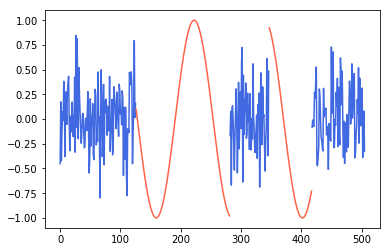

In [5]:
myplot(x_lst[0], y_lst[0])

In [10]:
def padding(x_lst, y_lst):
    """
    :ret train_X:[batch_size, seq_length, in_dim], train_Y:[batch_size, seq_length, out_dim]
    train_X will be padded with float('inf')
    """
    
    size = len(x_lst)
    max_len = 0
    for x in x_lst:
        max_len = max(max_len, len(x))
    
    train_X = np.ones((len(x_lst), max_len, 1)) * float('inf')
    train_Y = np.zeros((len(y_lst), max_len, 3))
    for idx in range(size):
        x = x_lst[idx]
        y = y_lst[idx]
        train_X[idx,:len(x),0] = x
        for ctg in (0, 1):
            msk = np.zeros(max_len).astype('bool')
            msk[:len(y)] = (y == ctg)
            train_Y[idx, msk, ctg] = np.ones(msk.sum())
    
    return train_X, train_Y

def mask(train_X):
    m = (train_X != float('inf')).sum(axis = 2) #[batch_size, seq_length]
    return m

In [48]:
mat = np.arange(12).reshape(3, 4)
msk = mat < 6

In [49]:
mat[msk]

array([0, 1, 2, 3, 4, 5])

In [11]:
train_X, train_Y = padding(x_lst, y_lst)

In [12]:
train_X_m = mask(train_X)

In [21]:
train_Y.shape

(10, 683, 3)

In [33]:
train_X[train_X_m[:,:]].shape

(10, 683, 683, 1)

In [31]:
train_Y[train_X_m[:,:,np.newaxis]]

(10, 683, 1, 683, 3)

In [42]:
msk.shape

(4, 3, 2)

In [45]:
mat = np.arange(12).reshape(4,3)
msk = mat % 2 == 0
mat[msk, :]

IndexError: too many indices for array

In [46]:
msk

array([[ True, False,  True],
       [False,  True, False],
       [ True, False,  True],
       [False,  True, False]], dtype=bool)

In [ ]:
train_Y[0, train_X_m[0], :]

In [ ]:
train_X_m[0]

In [ ]:
train_X = np.zeros((100, 500, 1))  # in_dim = 1
train_Y = np.zeros((100, 500, 3))  # out_dim = 3

In [ ]:
plt.plot(np.arange(len(x)), x)

In [ ]:
train_X, valid_X, train_Y, valid_Y = train_test_split(train_X, train_Y, test_size=0.2, random_state=random_state)
train_m = np.ones((train_X.shape[0], 500))
valid_m = np.ones((valid_Y.shape[0], 500))

In [ ]:
import numpy as np

In [ ]:
arr =np.ones(3)
arr[1:] = float('inf')

In [ ]:
arr

In [ ]:
arr == float('inf')